In [ ]:
!pip3 install wordcloud

In [98]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from wordcloud import WordCloud

# Loading the dataset

In [3]:
df = pd.read_csv('/content/fraud_payment_data.csv')

In [4]:
df.shape

(1498177, 13)

In [5]:
df.head()

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098,ACCOUNT-10108,USA,35537.0,CCB,NaN,NaN,NaN,558.43,0,WITHDRAWAL
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54,0,DEPOSIT-CASH
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78,0,DEPOSIT-CHECK


# Exploratory Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498177 entries, 0 to 1498176
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Time_step         1498177 non-null  object 
 1   Transaction_Id    1498177 non-null  object 
 2   Sender_Id         1279291 non-null  object 
 3   Sender_Account    1279291 non-null  object 
 4   Sender_Country    1279291 non-null  object 
 5   Sender_Sector     1279291 non-null  float64
 6   Sender_lob        1279291 non-null  object 
 7   Bene_Id           1282284 non-null  object 
 8   Bene_Account      1282284 non-null  object 
 9   Bene_Country      1282284 non-null  object 
 10  USD_amount        1498177 non-null  float64
 11  Label             1498177 non-null  int64  
 12  Transaction_Type  1498177 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 148.6+ MB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time_step,1498177,639300,2051-01-26 03:27:02,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction_Id,1498177,1498177,EXCHANGE-10115,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sender_Id,1279291,59071,JPMC-CLIENT-1730807,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sender_Account,1279291,75161,ACCOUNT-1591424,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sender_Country,1279291,252,USA,997236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sender_Sector,1279291.0,NaN,NaN,NaN,25021.33413,14431.714191,0.0,12534.0,25023.0,37530.5,49999.0
Sender_lob,1279291,1,CCB,1279291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bene_Id,1282284,279357,JPMC-CLIENT-1119942,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bene_Account,1282284,295031,ACCOUNT-1029621,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bene_Country,1282284,252,USA,757908,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.dtypes

Time_step            object
Transaction_Id       object
Sender_Id            object
Sender_Account       object
Sender_Country       object
Sender_Sector       float64
Sender_lob           object
Bene_Id              object
Bene_Account         object
Bene_Country         object
USD_amount          float64
Label                 int64
Transaction_Type     object
dtype: object

## Missing values

In [9]:
df.isnull().sum()

Time_step                0
Transaction_Id           0
Sender_Id           218886
Sender_Account      218886
Sender_Country      218886
Sender_Sector       218886
Sender_lob          218886
Bene_Id             215893
Bene_Account        215893
Bene_Country        215893
USD_amount               0
Label                    0
Transaction_Type         0
dtype: int64

## Duplicates

In [10]:
df.duplicated().sum()

0

## Data types

In [11]:
df['Time_step'] = pd.to_datetime(df['Time_step'])

In [12]:
df.dtypes

Time_step           datetime64[ns]
Transaction_Id              object
Sender_Id                   object
Sender_Account              object
Sender_Country              object
Sender_Sector              float64
Sender_lob                  object
Bene_Id                     object
Bene_Account                object
Bene_Country                object
USD_amount                 float64
Label                        int64
Transaction_Type            object
dtype: object

## Data Imbalance

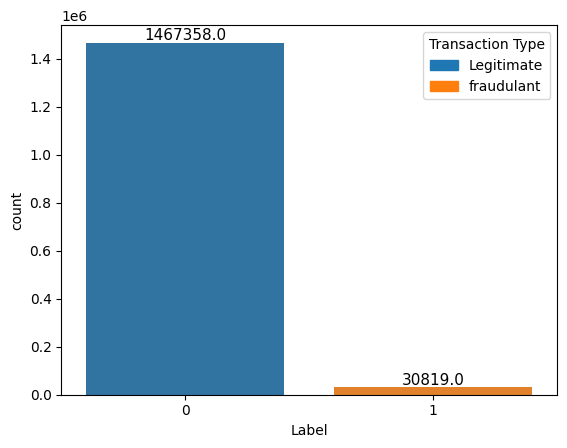

In [99]:
labels = ['Legitimate','fraudulant']
ax = sns.countplot(x='Label', data=df)
legitimate_patch = mpatches.Patch(color=sns.color_palette()[0], label=labels[0])
fraudulent_patch = mpatches.Patch(color=sns.color_palette()[1], label=labels[1])

ax.legend(handles=[legitimate_patch, fraudulent_patch], title='Transaction Type', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show();

    -  The plot depicts the counts of two transaction labels: Legitimate (0) and Fraudulent (1).
    -  Legitimate transactions (label 0) vastly outnumber the fraudulent ones, with a count nearing 1.4 million.
    -  Fraudulent transactions (label 1) are rare in comparison to the legitimate ones.

    This marked disparity indicates that fraudulent activities are considerably less frequent than legitimate ones in the given dataset.

## Univariant Analysis

In [14]:
df.nunique()

Time_step            639300
Transaction_Id      1498177
Sender_Id             59071
Sender_Account        75161
Sender_Country          252
Sender_Sector         50000
Sender_lob                1
Bene_Id              279357
Bene_Account         295031
Bene_Country            252
USD_amount           100685
Label                     2
Transaction_Type          8
dtype: int64

### Checking counts of each transaction_type in the dataset

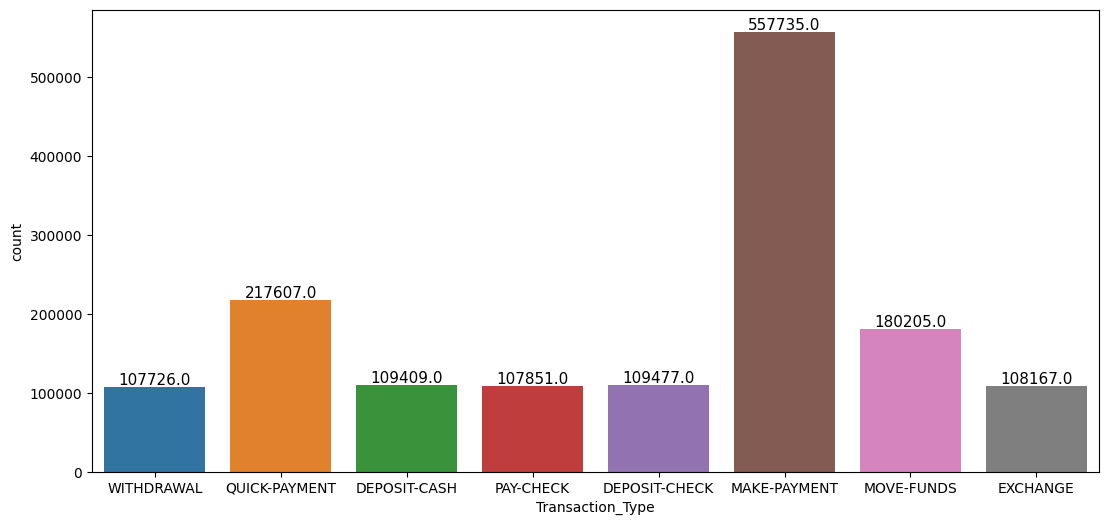

In [15]:
plt.figure(figsize=(13,6))
ax = sns.countplot(x='Transaction_Type', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show();

    There are eight distinct transaction types
    -  The "MAKE-PAYMENT" transaction type is the most frequent with a count surpassing 550,000. It notably stands out as having a much higher frequency than the rest.
    -  The transaction types DEPOSIT-CASH, PAY-CHECK, DEPOSIT-CHECK, and QUICK-PAYMENT all hover around the 100,000 to 220,000 range, indicating a moderate frequency of occurrence.
    -  While MOVE-FUNDS takes the middle ground, WITHDRAWAL and EXCHANGE remains less frequently used transactions

    To truly understand fraudulent transactions, we can further analyse:

    -  Cross-referencing these counts with known fraudulent and legitimate cases.
    -  Analyzing transaction amounts, timings, and associated accounts for irregularities.

### Country-Wise counts of transactions

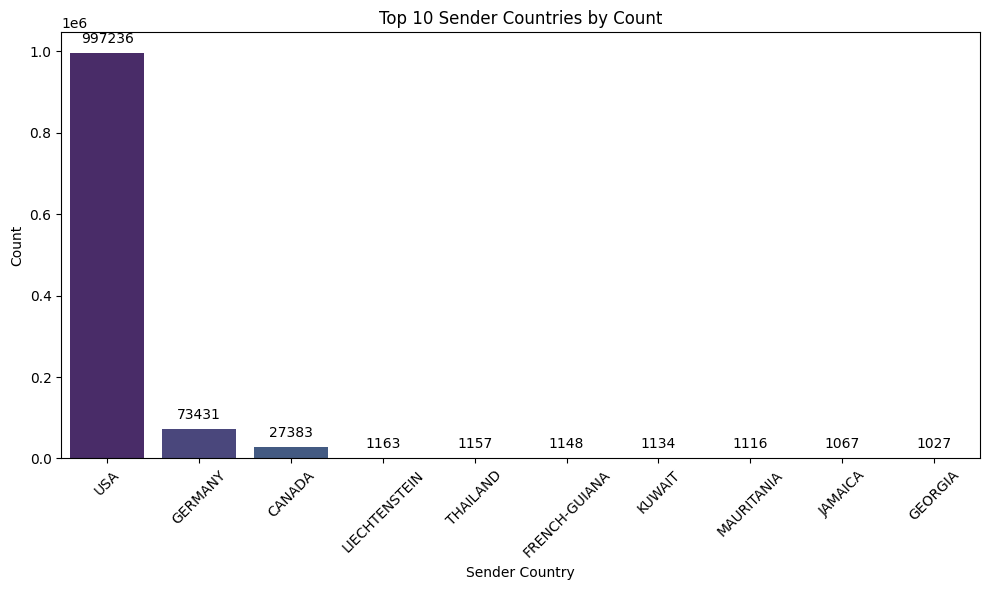

In [16]:
category_counts = df['Sender_Country'].value_counts()

# Get the top N categories (e.g., top 3 for this example)
top_n_categories = category_counts.head(10).index

# Plot using countplot, while only considering the top N categories
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='Sender_Country', order=top_n_categories, palette='viridis')
plt.title('Top 10 Sender Countries by Count')
plt.ylabel('Count')
plt.xlabel('Sender Country')
plt.xticks(rotation=45)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

    The top 10 sender countries span multiple continents, including North America, Europe, Asia, and the Caribbean, indicating a wide geographic spread of transaction origins.

### Distribution of transaction amount

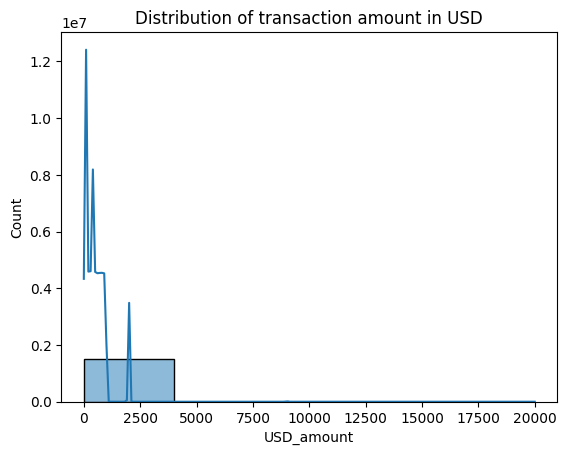

In [17]:
sns.histplot(data=df, x='USD_amount',kde=True,bins=5)
plt.title("Distribution of transaction amount in USD");

    -  The vast majority of transactions are clustered in the lower range, close to 0 USD, indicating that smaller transactions are more frequent.

    -  while most transactions are of low value, there's a noticeable number of mid-range transactions, with high-value transactions being quite uncommon.

## Bivariant analysis

### Cross-referencing transaction type with label

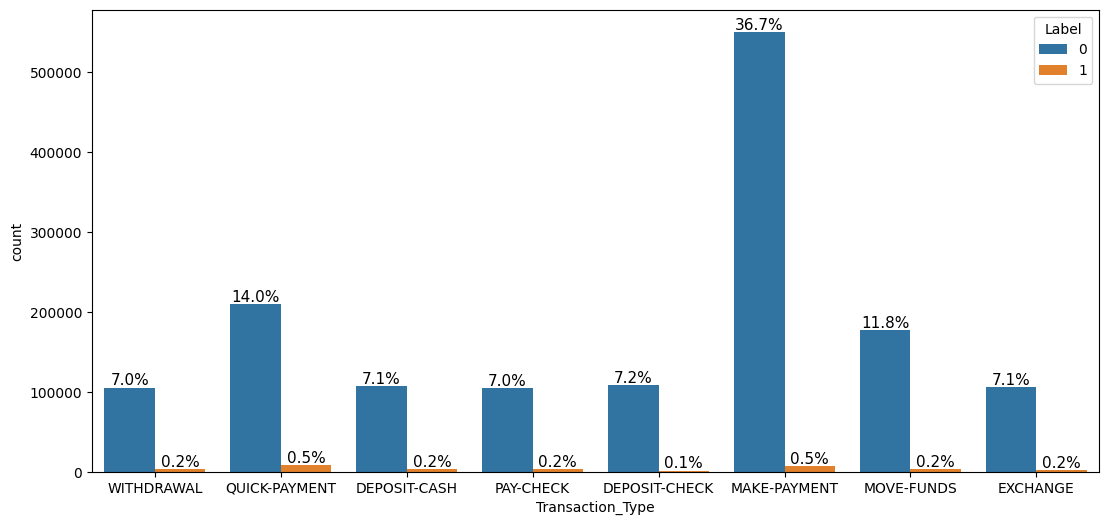

In [18]:
plt.figure(figsize=(13,6))
ax = sns.countplot(x='Transaction_Type', data=df,hue='Label')


total = sum([p.get_height() for p in ax.patches])

for p in ax.patches:
    # Calculate percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)

    # Annotate the percentage on the histogram
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show();

    -  It appears that most transaction types have a low fraudulent rate below 1%.
    
    -  However, it's essential to understand that the sheer volume of transactions, especially in types like "MAKE-PAYMENT,QUICK-PAYMENT" can result in a considerable number of frauds.

### Country-wise Fradulant transaction

In [19]:
fraud_transaction = df[df['Label']==1]

fraud_transaction_grouped = fraud_transaction.groupby('Sender_Country')['Transaction_Id'].count().reset_index()\
.rename(columns={'Transaction_Id': 'count'}).sort_values('count',ascending=False)

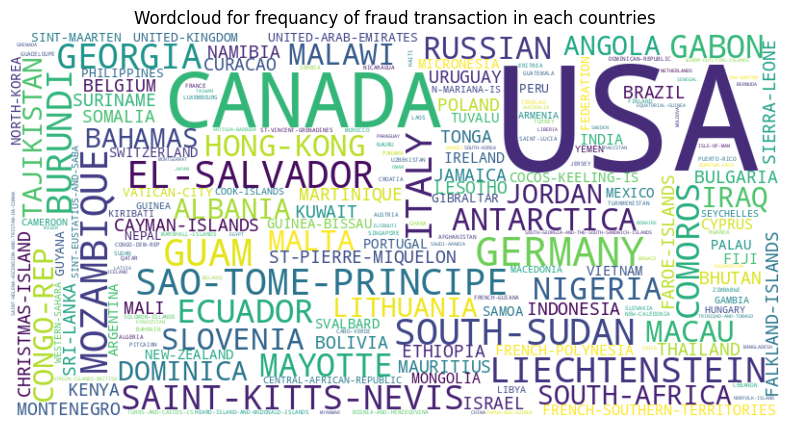

In [20]:

data_dict = dict(zip(fraud_transaction_grouped['Sender_Country'], fraud_transaction_grouped['count']))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data_dict)


plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud for frequancy of fraud transaction in each countries")
plt.axis('off')
plt.show()

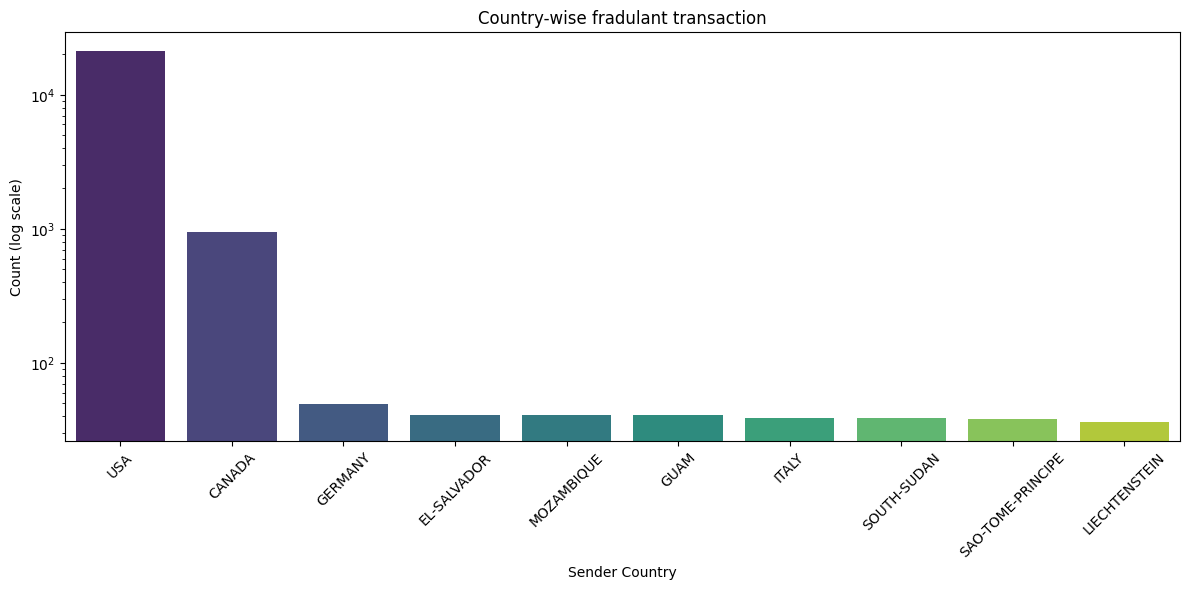

In [21]:
top_10 = fraud_transaction_grouped.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Sender_Country', y='count', data=top_10, palette="viridis")
plt.yscale('log')
plt.title('Country-wise fradulant transaction')
plt.ylabel('Count (log scale)')
plt.xlabel('Sender Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    The word cloud provides a visual representation of the frequency of fraud transactions in various countries.
    
    The larger the text size of a country's name, the higher the frequency of fraud transactions associated with that country.

      -  USA and Canada: These two North American countries appear prominently in the word cloud, indicating a significant frequency of fraud transactions.

      -  It would be beneficial to further analyze the specifics of the fraud transactions within North America and devise tailored strategies.

### Analyzing within North America.

In [89]:
df_north_america = df[df['Sender_Country'].isin(['USA','CANADA'])]
df_north_america['date'] = df_north_america['Time_step'].dt.date
df_north_america['year'] = df_north_america['Time_step'].dt.year


<ipython-input-89-56498f97a48c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north_america['date'] = df_north_america['Time_step'].dt.date
<ipython-input-89-56498f97a48c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north_america['year'] = df_north_america['Time_step'].dt.year


In [110]:
df_north_america.isnull().sum()

Time_step                0
Transaction_Id           0
Sender_Id                0
Sender_Account           0
Sender_Country           0
Sender_Sector            0
Sender_lob               0
Bene_Id             191822
Bene_Account        191822
Bene_Country        191822
USD_amount               0
Label                    0
Transaction_Type         0
date                     0
year                     0
dtype: int64

#### Transaction amount analysis by transaction labels within north america

In [90]:
fraud_transaction = df_north_america[df_north_america['Label']==1]
legitimate_transaction = df_north_america[df_north_america['Label']==0]

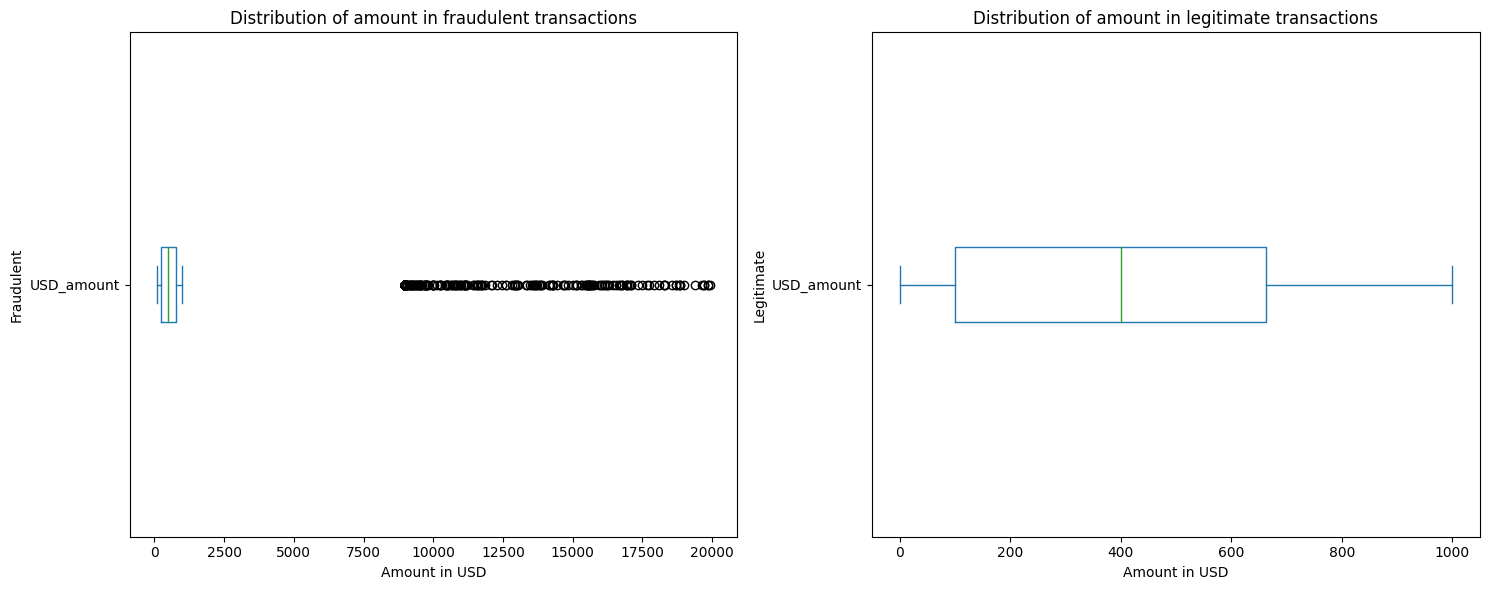

In [91]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting the fraudulent transactions on the first subplot
fraud_transaction['USD_amount'].plot(kind='box', ax=axes[0], vert=False)
axes[0].set_title('Distribution of amount in fraudulent transactions')
axes[0].set_xlabel('Amount in USD')
axes[0].set_ylabel('Fraudulent')

# Plotting the legitimate transactions on the second subplot
legitimate_transaction['USD_amount'].plot(kind='box', ax=axes[1], vert=False)
axes[1].set_title('Distribution of amount in legitimate transactions')
axes[1].set_xlabel('Amount in USD')
axes[1].set_ylabel('Legitimate')

# Adjusting the layout
plt.tight_layout()
plt.show()


    Fraudulent Transactions:
      -  Most fraudulent transactions seem to be of a smaller amount.
      -  There are numerous outliers on the higher side, suggesting that while most fraudulent transactions are for smaller amounts, some fraud attempts involve significantly larger sums.
    Legitimate Transactions:
      -  The distribution of legitimate transaction amounts is also mostly on the smaller side, but the interquartile range is larger than that of fraudulent transactions.
      -  The median value is indicated by the green line inside the box, and it appears to be higher than the median of fraudulent transactions.
      
    - There's a notable presence of higher-value transactions, which means such transactions are relatively more common in Fraud cases than in legitimate ones.

#### Transaction counts over year

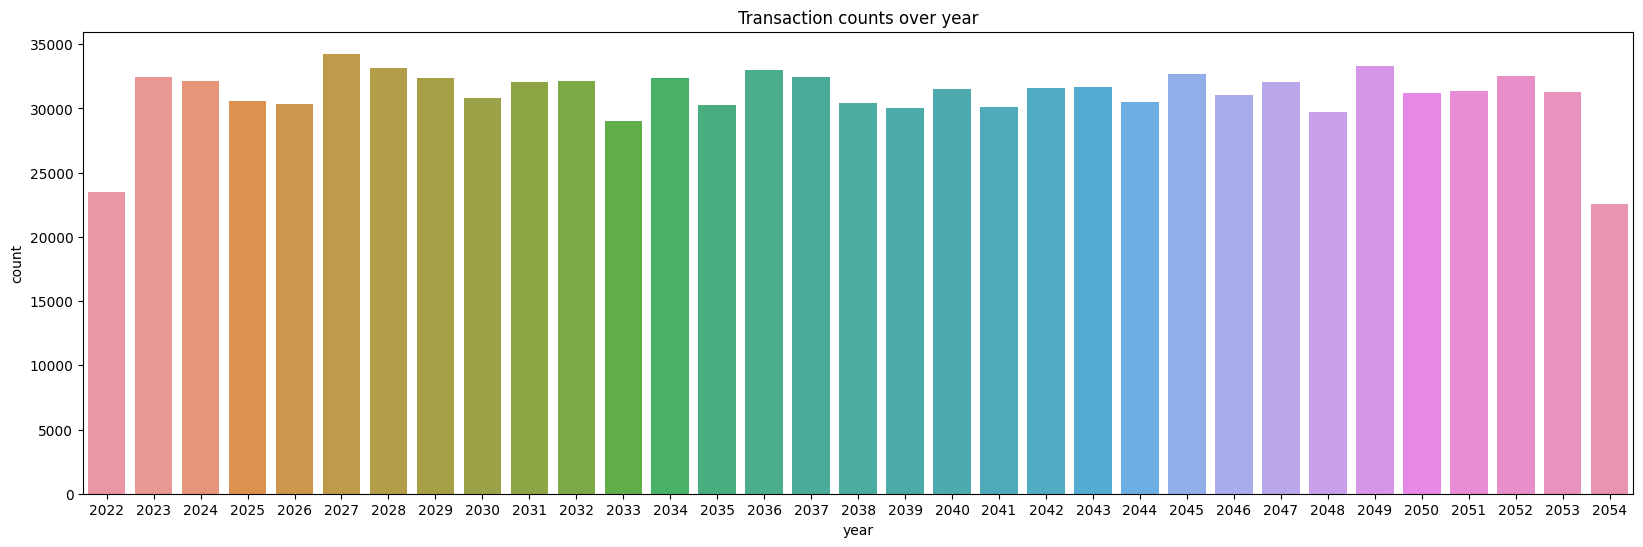

In [92]:

#plotting
plt.figure(figsize=(20,6))
sns.countplot(x='year',data=df_north_america)
plt.title("Transaction counts over year");

    Based on the bar chart, the number of transactions appears to be relatively consistent across the years.

    There are some fluctuations, but overall there doesn't seem to be any drastic drop or surge in transaction counts from year to year.

    This consistent pattern indicates stability and predictability in transactional activities over the given timeframe.

#### Identifying suspicious activity based on transaction frequency

In [103]:
df_grouped = df_north_america.groupby(['Sender_Account', 'date','Label']).size().reset_index(name='count')


In [109]:
df_grouped.describe()

,Label,count
count,626235.000000,626235.000000
mean,0.024588,1.636157
std,0.154867,0.929917
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,2.000000
max,1.000000,11.000000


In [104]:
frequency_over_time = df_grouped[['Label','count']].value_counts()

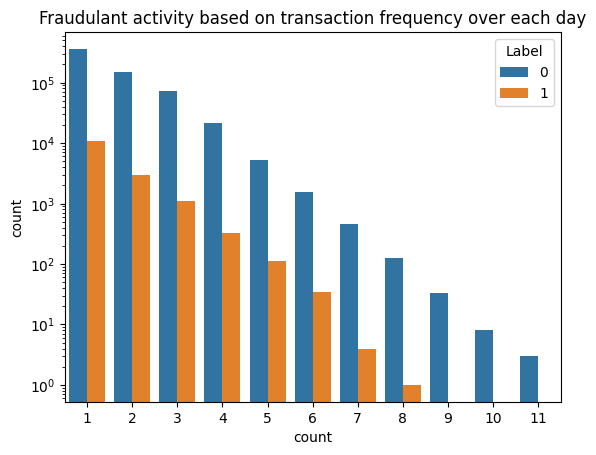

In [108]:
ax = sns.countplot(x='count',data=df_grouped,hue='Label')
ax.set_yscale('log')
plt.title("Fraudulant activity based on transaction frequency over each day");

# Exploratory Data Analysis summary:

  
        1. Around 200k sender and beneficiery details are missing in the data.
        2. There are no duplicate records
        3. Data is highly imbalanced where 1 million records falls under legitimate and 30k under fradulant.
        4. Most of the transactions are usually lower value, there is a notable presence of higher-value transactions(outliers), which means such transactions are relatively more common in Fraud cases than in legitimate ones.
        5. There are suspicious activities in almost all 8 transaction types but QUICK-PAYMENT and MAKE_PAYMENT marks high.
        6. Among 252 countries, North American regions like USA and CANADA are more prone to Fraudulant activities.
        7. Within North America, around 1k beneficiery details are missing.
        8. Since the data is synthetic, given dataset contains transaction data from year 2022 to 2054 and there is no drastic drop or surge in transaction counts from year to year.
        9. No of transaction sender does every day ranges from 1 to 11 with mean being 2 (i.e., senders are prone to do atleast 2 transactions in a day)
        10. More Fraud activities noticied within 1 to 8 transaction per day.

    To Proceed, we can segment the data to North America.
    within North America:
        - only beneficiery details are missing which can be treated as is.
        - Handling Data Imbalance using industry standard techniques like ...,



